<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_10/blob/main/HW_DATA_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Частина 1***

*​В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.*

*На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання.*
**Зробіть висновки**




In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
# Це комбінація згорткової мережі (Convolutional Neural Network, CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)


Epoch 1/50
750/750 [==============================] - 30s 38ms/step - loss: 0.5123 - accuracy: 0.8175 - val_loss: 0.3577 - val_accuracy: 0.8722
Epoch 2/50
750/750 [==============================] - 27s 36ms/step - loss: 0.3589 - accuracy: 0.8701 - val_loss: 0.3126 - val_accuracy: 0.8901
Epoch 3/50
750/750 [==============================] - 26s 34ms/step - loss: 0.3201 - accuracy: 0.8851 - val_loss: 0.2965 - val_accuracy: 0.8933
Epoch 4/50
750/750 [==============================] - 26s 34ms/step - loss: 0.2977 - accuracy: 0.8901 - val_loss: 0.2780 - val_accuracy: 0.9002
Epoch 5/50
750/750 [==============================] - 25s 34ms/step - loss: 0.2740 - accuracy: 0.9000 - val_loss: 0.2712 - val_accuracy: 0.9036
Epoch 6/50
750/750 [==============================] - 25s 33ms/step - loss: 0.2606 - accuracy: 0.9037 - val_loss: 0.2597 - val_accuracy: 0.9077
Epoch 7/50
750/750 [==============================] - 25s 34ms/step - loss: 0.2464 - accuracy: 0.9095 - val_loss: 0.2538 - val_accuracy:

In [6]:
# Багатошарова мережа
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mlp = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)


Epoch 1/50
750/750 [==============================] - 6s 7ms/step - loss: 0.8495 - accuracy: 0.6852 - val_loss: 0.5223 - val_accuracy: 0.8152
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.6114 - accuracy: 0.7758 - val_loss: 0.4673 - val_accuracy: 0.8282
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.5735 - accuracy: 0.7869 - val_loss: 0.4341 - val_accuracy: 0.8387
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.5521 - accuracy: 0.7948 - val_loss: 0.4209 - val_accuracy: 0.8468
Epoch 5/50
750/750 [==============================] - 5s 6ms/step - loss: 0.5358 - accuracy: 0.8012 - val_loss: 0.4115 - val_accuracy: 0.8467
Epoch 6/50
750/750 [==============================] - 5s 6ms/step - loss: 0.5275 - accuracy: 0.8043 - val_loss: 0.4117 - val_accuracy: 0.8528
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.5124 - accuracy: 0.8076 - val_loss: 0.4009 - val_accuracy: 0.8558
Epoch 

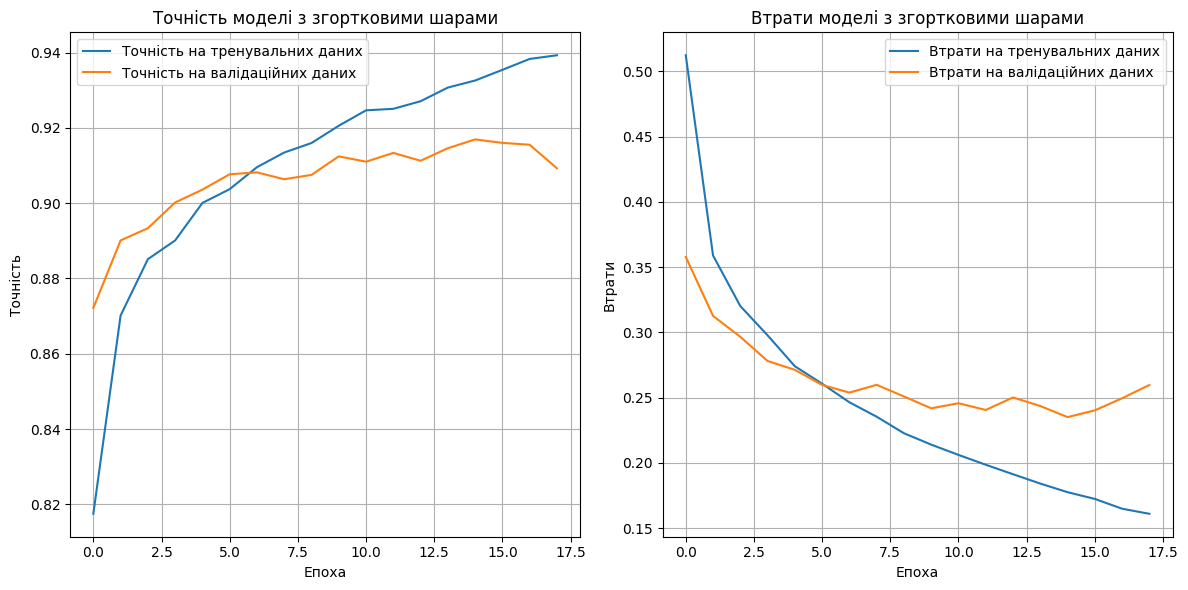

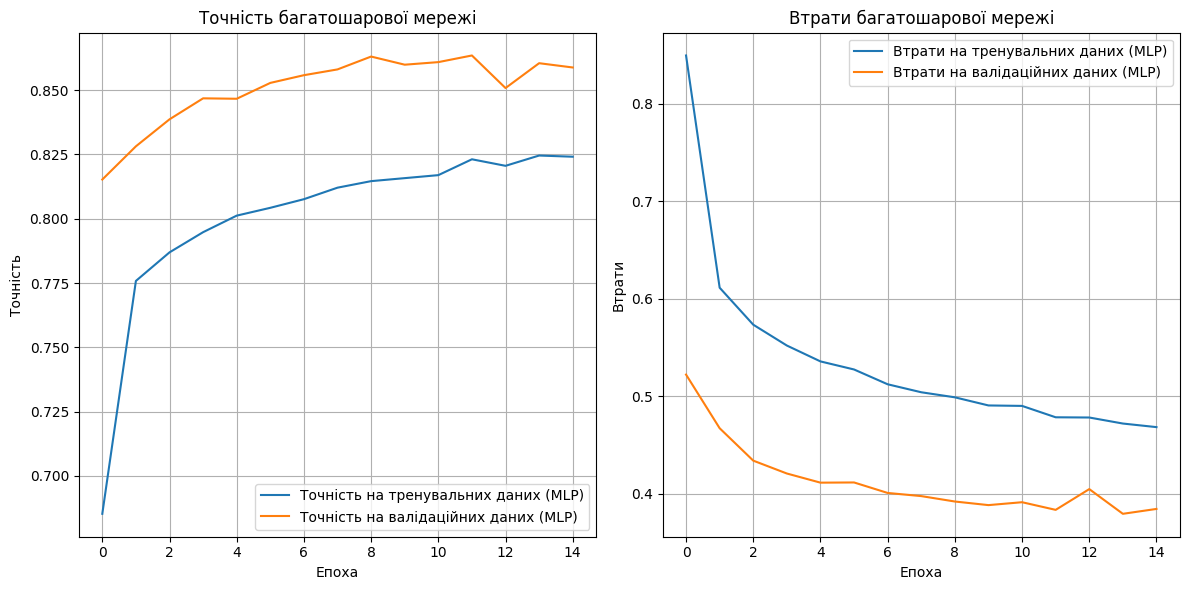

In [11]:
# Для першої мережі
plt.figure(figsize=(12,6))

# Графік точності на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()
plt.title('Точність моделі з згортковими шарами')

# Графік втрат на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()
plt.title('Втрати моделі з згортковими шарами')

plt.tight_layout()
plt.show()

# Графік для багатошарової перцептронної мережі (MLP)
plt.figure(figsize=(12, 6))

# Графік точності на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Точність на тренувальних даних (MLP)')
plt.plot(history_mlp.history['val_accuracy'], label='Точність на валідаційних даних (MLP)')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()
plt.title('Точність багатошарової мережі')

# Графік втрат на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Втрати на тренувальних даних (MLP)')
plt.plot(history_mlp.history['val_loss'], label='Втрати на валідаційних даних (MLP)')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()
plt.title('Втрати багатошарової мережі')

plt.tight_layout()
plt.show()


За даними можна зробити наступні висновки:

* Згорткова мережа досягла високої точності на тестових даних
у розмірі 91.54%, що свідчить про її добру універсальність на нових, раніше не бачених даних.

* Точність на тренувальних даних для згорткової мережі становить 94.89%, що свідчить про високу здатність моделі підлаштовуватися під тренувальні дані.

* Час тренування згорткової мережі становить 7 хвилин, що є прийнятним для такого рівня точності та складності моделі.

* Багатошарова мережа також досягла досить високої точності на тестових даних у розмірі 85.59%, але менше, ніж згорткова мережа.

* Точність на тренувальних даних для багатошарової мережі складає 86.79%, що може свідчити про перенавчання моделі або про меншу здатність моделі адаптуватися до нових даних.

* Час тренування багатошарової мережі значно менший - лише 1 хвилина, що може бути перевагою у випадках, коли важливий час тренування.

Отже, згорткова мережа демонструє кращі результати як у точності, так і у здатності універсального застосування на нових даних, але вона вимагає більше часу для тренування порівняно з багатошаровою мережею, яка, у свою чергу, має меншу точність.


